# Question: What could we do to improve the course in the future?

### An Interactive Deep Dive into Survey Results: Sentiment Analysis

### Sentiment analysis involves the use of data mining, machine learning (ML), artificial intelligence and computational linguistics to mine text for sentiment and subjective information such as whether it is expressing positive, negative or neutral feelings.

### I decided to use the Machine Learning CRISP analysis approach for this survey data.

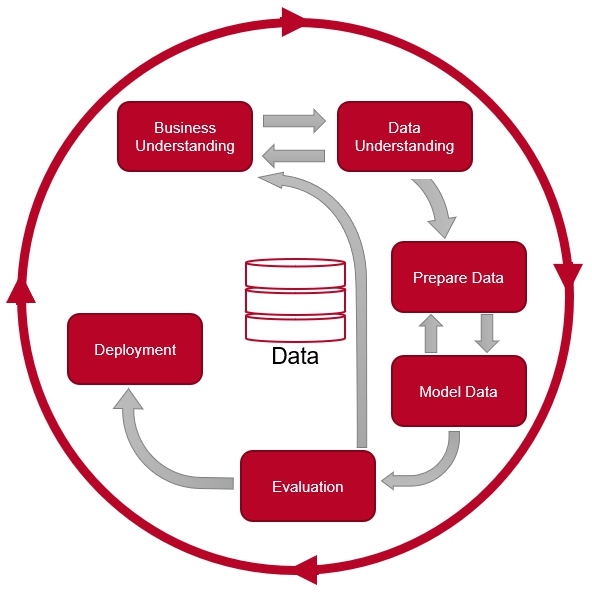

In [1]:
from PIL import Image
img = Image.open(r"C:\\Users\\alvesd\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\24_Sentiment_Analysis\\Crisp_Analysis_Pic.jpg")
img

# Step1 - Load the codes libraries:

In [2]:
import pandas as pd            #Pandas
from textblob import TextBlob #For Sentiment Anlysis
from itertools import islice #Will Explain Later
import matplotlib.pyplot as plt

# Step 2 - Load the data

In [3]:
df_survey_1_to_6 = pd.read_excel("C:\\Users\\alvesd\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='1_to_6')

In [4]:
df_survey_7_and_8 = pd.read_excel("C:\\Users\\alvesd\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='7_and_8')

In [5]:
df_survey_9_and_10 = pd.read_excel("C:\\Users\\alvesd\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='9_and_10')

In [6]:
df_survey_full= pd.read_excel("C:\\Users\\alvesd\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='Sentiment1')

# Step 3 - View the data:

In [7]:
df_survey_full.head()

,Userid,Response_1_to_10,Response_Score_Groups,Year,Quarter,Year.1,Quarter.1,Year.2,Quarter.2,What could we do to improve the course in the future?
0,aacurt,10,9 & 10,2023,Qtr 1,2023,Qtr 1,2023,Qtr 1,Unknown.
1,aajone,9,9 & 10,2023,Qtr 1,2023,Qtr 1,2023,Qtr 1,Take it to a 5 day course instead of 3 a lot o...
2,adhuss,10,9 & 10,2023,Qtr 1,2023,Qtr 1,2023,Qtr 1,"I would advise, people should be advised to le..."
3,adyaxl,5,2 & 3 & 4 & 5 & 6,2023,Qtr 1,2023,Qtr 1,2023,Qtr 1,"received A.3 Cards, Process, product as traini..."
4,aikene,10,9 & 10,2023,Qtr 1,2023,Qtr 1,2023,Qtr 1,I would supply more example material.


In [8]:
#df_survey_1_to_6.head()

In [9]:
#df_survey_7_and_8.head()

In [10]:
#df_survey_9_and_10.head()


# First Sentiment Model: TF-IDF

## Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. 

### - 0 will be encoded as -1 as they indicate negative sentiment
### - 1,2,3,4,5,6 will be labeled as neutral sentiment
### - 7 & 8 & 9 & 10 will be labeled as +1 as they indicate positive sentiment

In [11]:
import numpy as np

def create_sentiment(rating):
    
    if rating==0:
        return -1 # negative sentiment
    elif rating=='9 & 10'or rating=='7 & 8':
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

#df_survey_full['Sentiment'] = df_survey_full['Any further comments you would like to add?'].apply(create_sentiment)
df_survey_full['Sentiment1'] = df_survey_full['What could we do to improve the course in the future?'].apply(create_sentiment)
#df_survey_full['Sentiment2'] = df_survey_full['Comments'].apply(create_sentiment)
#df_survey_full['Sentiment3'] = df_survey_full['What was most valuable / effective aspect of this course?'].apply(create_sentiment)

In [12]:
df_survey_full1 = df_survey_full[['Userid', 'Response_1_to_10', 'Response_Score_Groups', 'What could we do to improve the course in the future?', 'Sentiment1']]

In [13]:
df_survey_full = df_survey_full1.dropna(subset=['What could we do to improve the course in the future?'])

In [14]:
df_survey_full

,Userid,Response_1_to_10,Response_Score_Groups,What could we do to improve the course in the future?,Sentiment1
0,aacurt,10,9 & 10,Unknown.,0
1,aajone,9,9 & 10,Take it to a 5 day course instead of 3 a lot o...,0
2,adhuss,10,9 & 10,"I would advise, people should be advised to le...",0
3,adyaxl,5,2 & 3 & 4 & 5 & 6,"received A.3 Cards, Process, product as traini...",0
4,aikene,10,9 & 10,I would supply more example material.,0
...,...,...,...,...,...
301,wechen,3,2 & 3 & 4 & 5 & 6,"There were multiple technical difficulties, wh...",0
302,weherm1,8,7 & 8,it's good the way it is,0
303,wewang1,9,9 & 10,I think it's already very good,0
304,wijewe,8,7 & 8,Better build up to the team / group tests- som...,0


### Data Cleansing and remove characters: 

In [15]:
from sklearn.feature_extraction.text import re

def clean_data(review):
    
    no_punc = re.sub("[^a-zA-Z]", " ",str(review))
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)

In [16]:
#df_survey_full['Any further comments you would like to add?'] = df_survey_full['Any further comments you would like to add?'].apply(clean_data)
df_survey_full['What could we do to improve the course in the future?'] = df_survey_full['What could we do to improve the course in the future?'].apply(clean_data)
#df_survey_full['Comments'] = df_survey_full['Comments'].apply(clean_data)
#df_survey_full['What was most valuable / effective aspect of this course?'] = df_survey_full['What was most valuable / effective aspect of this course?'].apply(clean_data)

# Check if the cleansing worked:
#df_survey_full['Any further comments you would like to add?'][0]
#df_survey_full['What could we do to improve the course in the future?'][0]
#df_survey_full['Comments'][0]
#df_survey_full['What was most valuable / effective aspect of this course?'][0]

C:\Users\alvesd\AppData\Local\Temp\ipykernel_65988\2129519349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey_full['What could we do to improve the course in the future?'] = df_survey_full['What could we do to improve the course in the future?'].apply(clean_data)


# Vectorize our data: What could we do to improve the course in the future?
### What is vectorization? Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df_survey_full['What could we do to improve the course in the future?'])

### Building and Evaluating the Machine Learning Model: Any further comments you would like to add?

### We can now train our algorithm on the review data to classify its sentiment into 3 categories:

### - Positive
### - Negative
### - Neutral

### First, let’s perform a train-test split: Any further comments you would like to add?

In [18]:
from sklearn.model_selection import train_test_split
y = df_survey_full['What could we do to improve the course in the future?'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Now, fit a logistic regression classifier on the training dataset and use it to make predictions on the test data: What could we do to improve the course in the future?

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

### The first model has an accuracy of approximately: What could we do to improve the course in the future?

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test) 

0.2028985507246377

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 

%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

### Split the data: What could we do to improve the course in the future?

In [22]:
df_survey_full_comments = df_survey_full[['What could we do to improve the course in the future?', 'Sentiment1']]

In [23]:
df_survey_full_comments

,What could we do to improve the course in the future?,Sentiment1
0,Unknown,0
1,Take it to a day course instead of a lot o...,0
2,I would advise people should be advised to le...,0
3,received A Cards Process product as traini...,0
4,I would supply more example material,0
...,...,...
301,There were multiple technical difficulties wh...,0
302,it s good the way it is,0
303,I think it s already very good,0
304,Better build up to the team group tests som...,0


### Check the rows with Positive, Neutral, and Negative results: What could we do to improve the course in the future?

In [24]:
df_survey_full_comments['Sentiment1'].value_counts()
# 1 - Positive
# 0 - Neutral
# -1 - Negative

Sentiment1
0    273
Name: count, dtype: int64

### Look for Null Values:

In [25]:
df_survey_full_comments.isnull().sum()

What could we do to improve the course in the future?    0
Sentiment1                                               0
dtype: int64

### Read in Data and NLTK Basics

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [27]:
#df_survey_full.head()

### Plot the results: Sentiment

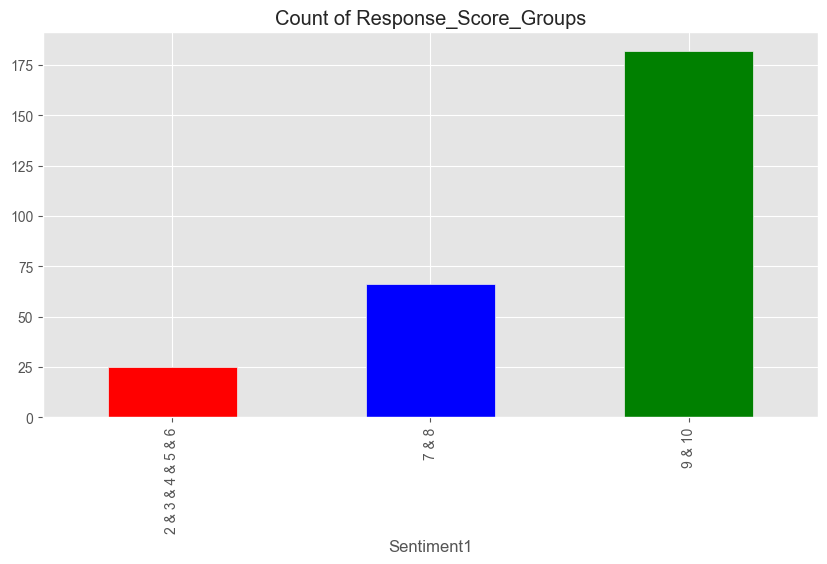

In [28]:
ax = df_survey_full['Response_Score_Groups'].value_counts().sort_index() \
    .plot(kind='bar',
          color=["red", "blue", "green"],
          title='Count of Response_Score_Groups',
          figsize=(10, 5))
ax.set_xlabel('Sentiment1')
plt.show()

### Check NLTK model accuracy: What could we do to improve the course in the future?

In [29]:
example = df_survey_full['What could we do to improve the course in the future?'][50]
print(example)

Seeing faces in teams   GOTO calls


In [30]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Seeing', 'faces', 'in', 'teams', 'GOTO', 'calls']

In [31]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Seeing', 'VBG'),
 ('faces', 'VBZ'),
 ('in', 'IN'),
 ('teams', 'NNS'),
 ('GOTO', 'NNP'),
 ('calls', 'NNS')]

In [32]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Seeing/VBG
  faces/VBZ
  in/IN
  teams/NNS
  (ORGANIZATION GOTO/NNP)
  calls/NNS)


# Second Model: VADER Sentiment Scoring

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

### Check VADER Model Efficiency:

In [34]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [35]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [36]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [37]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df_survey_full.iterrows(), total=len(df_survey_full)):
    text = row['What could we do to improve the course in the future?']
    myid = row['Userid']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/273 [00:00<?, ?it/s]

In [38]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Userid'})
vaders = vaders.merge(df_survey_full, how='left')

## Add a sentiment columns neg, neu, and pos.

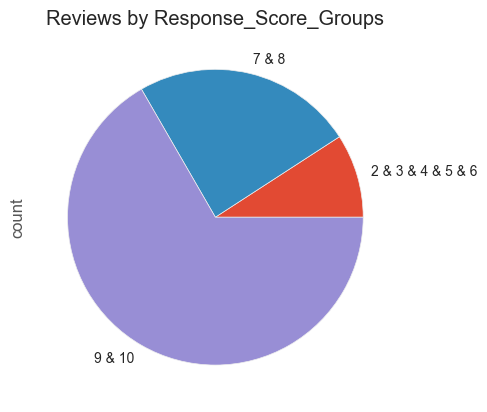

In [39]:
#Plotting Pie chart
plt=df_survey_full['Response_Score_Groups'].value_counts().sort_index().plot(kind='pie', 
                                                title="Reviews by Response_Score_Groups")
plt.plot();

### Let’s have an analysis of how many survey reviews there are for each Response_Score_Groups:

In [40]:
df_survey_full['Response_Score_Groups'].value_counts()

Response_Score_Groups
9 & 10               182
7 & 8                 66
2 & 3 & 4 & 5 & 6     25
Name: count, dtype: int64

### Plot the scores by Response Score Groups:
### Compound score: compound corresponds to the sum of the valence score of each word in the lexicon and determines the degree of the sentiment rather than the actual value as opposed to the previous ones. Its value is between -1 (most extreme negative sentiment) and +1 (most extreme positive sentiment)
## "In other words, determining which word is positive, negative, or neutral! Based on statistic"
### But what are the middle lines? Its called "Error bars”. The bar is the confidence interval for the variable as the library describes, i.e. it's interval where the 100 % of your variable lies in, which is estimated by bootstrapping method (in statistics).

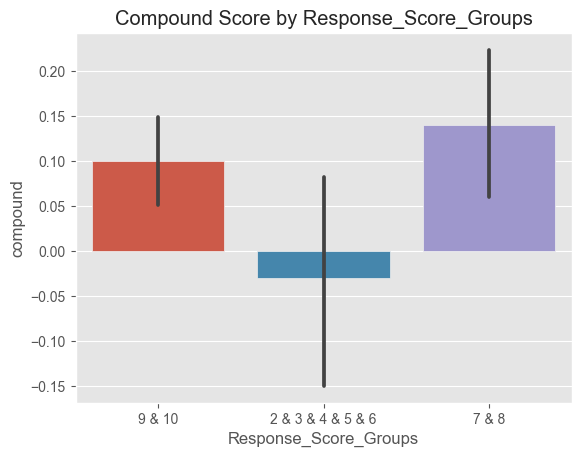

In [41]:
import matplotlib.pyplot as plt
ax = sns.barplot(data=vaders, x='Response_Score_Groups', y='compound')
ax.set_title('Compound Score by Response_Score_Groups')
plt.show()

### Plot the scores by Sentiment in each Response Score Groups:

### The barplots seem to be logical. Especially, when I look at the Positive Score vs Survey Score, I see that score 2 to 6 has the lowest positive score as it should be and vice versa for negative score.

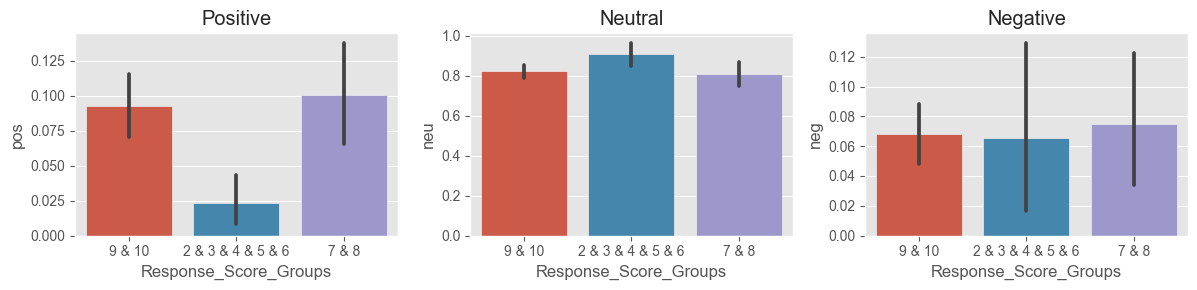

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Response_Score_Groups', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Response_Score_Groups', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Response_Score_Groups', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Third Model: Roberta Pretrained Model¶

### Use a model trained of a large corpus of data.
### Transformer model accounts for the words but also the context related to other words.

In [43]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [44]:
#git clone https://huggingface.co/cardiffnlp/twitter-roberta-base-emotion

In [45]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

### Check Roberta Pretrained Model Efficiency:

In [46]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Seeing faces in teams   GOTO calls


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

### Define the scores: neg, neu, and pos

In [47]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.06263251, 'roberta_neu': 0.8432523, 'roberta_pos': 0.09411523}


In [48]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

### It is possible to analyse the percentage of information collected:

In [49]:
res = {}
for i, row in tqdm(df_survey_full.iterrows(), total=len(df_survey_full)):
    try:
        text = row['What could we do to improve the course in the future?']
        myid = row['Userid']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/273 [00:00<?, ?it/s]

In [50]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Userid'})
results_df = results_df.merge(df_survey_full, how='left')

In [51]:
results_df.columns

Index(['Userid', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Response_1_to_10',
       'Response_Score_Groups',
       'What could we do to improve the course in the future?', 'Sentiment1'],
      dtype='object')

In [52]:
results_df

,Userid,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Response_1_to_10,Response_Score_Groups,What could we do to improve the course in the future?,Sentiment1
0,aacurt,0.000,1.000,0.000,0.0000,0.208124,0.681327,0.110549,10,9 & 10,Unknown,0
1,aajone,0.000,1.000,0.000,0.0000,0.340166,0.584333,0.075500,9,9 & 10,Take it to a day course instead of a lot o...,0
2,adhuss,0.000,1.000,0.000,0.0000,0.114634,0.781184,0.104182,10,9 & 10,I would advise people should be advised to le...,0
3,adyaxl,0.000,1.000,0.000,0.0000,0.696082,0.291028,0.012890,5,2 & 3 & 4 & 5 & 6,received A Cards Process product as traini...,0
4,aikene,0.000,1.000,0.000,0.0000,0.029970,0.623074,0.346956,10,9 & 10,I would supply more example material,0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,wechen,0.375,0.625,0.000,-0.6590,0.936292,0.058392,0.005316,3,2 & 3 & 4 & 5 & 6,There were multiple technical difficulties wh...,0
269,weherm1,0.000,0.633,0.367,0.4404,0.003603,0.043186,0.953211,8,7 & 8,it s good the way it is,0
270,wewang1,0.000,0.556,0.444,0.4927,0.001757,0.018799,0.979444,9,9 & 10,I think it s already very good,0
271,wijewe,0.000,0.800,0.200,0.6124,0.104300,0.491650,0.404051,8,7 & 8,Better build up to the team group tests som...,0


## Comparison of RobertA and VADER:
### I will use pairplot from the seaborn library to visualize the relationsship between two variables, which are sentiment scores from both RobertA and VADER.

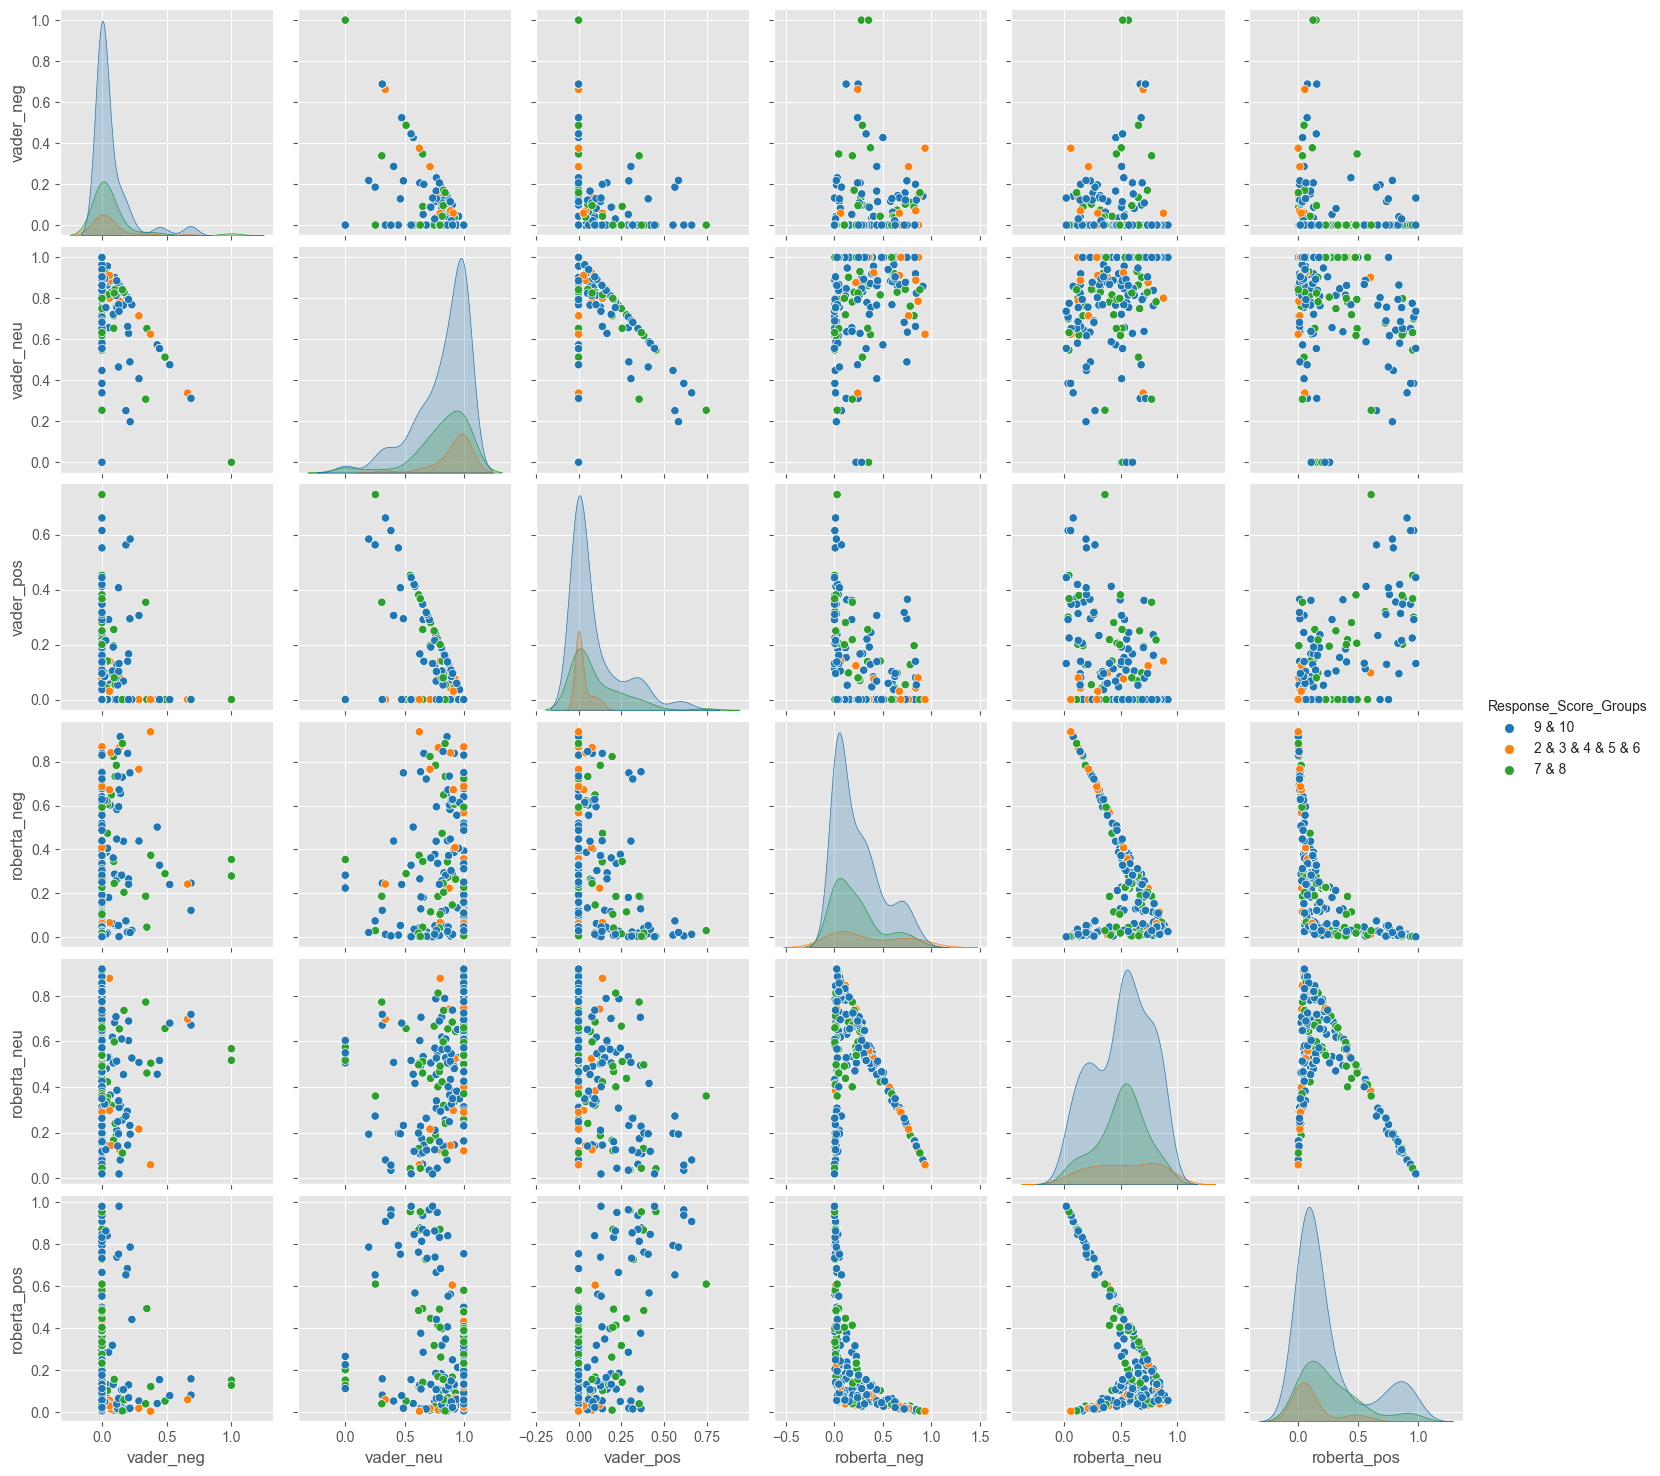

In [53]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Response_Score_Groups',
            palette='tab10')
plt.show()

# How do you Analyse skewed data?
## We can quantify how skewed our data is by using a measure aptly(The word aptly describes an action that's done appropriately or fittingly.) named skewness, which represents the magnitude and direction of the asymmetry of data: large negative values indicate a long left-tail distribution, and large positive values indicate a long right-tail. See above.

### When I look at the plots, we can make an overall prediction about the performance of RobertA and VADER: RobertA seems to cluster scores better compared to VADER.

### Now, I will try to determine the most confusing sentiments for each, RobertA and VADER for "Response_1_to_10": 0 and 10.

### Test both models: Positive sentiment with 2 star view.

In [54]:
results_df.query('Response_1_to_10 == 2') \
    .sort_values('roberta_pos', ascending=False)['What could we do to improve the course in the future?'].values[0]

'There needs to be more information about the actual changes rather than doing worked examples with little knowledge of the changes  The translations from VDA should be checked so that the information in the examples gives the same info as it does in the original German  The questions were focused on software which would be fine if it had not assumed knowledge needed to determine the responses to the questions  How are manufacturers of bulk chemicals supposed to know what software flashing is  for an example '

In [55]:
results_df.query('Response_1_to_10 == 2') \
    .sort_values('vader_pos', ascending=False)['What could we do to improve the course in the future?'].values[0]

'There needs to be more information about the actual changes rather than doing worked examples with little knowledge of the changes  The translations from VDA should be checked so that the information in the examples gives the same info as it does in the original German  The questions were focused on software which would be fine if it had not assumed knowledge needed to determine the responses to the questions  How are manufacturers of bulk chemicals supposed to know what software flashing is  for an example '

### Test both models: Negative sentiment with 10 star view.

In [56]:
results_df.query('Response_1_to_10 == 10') \
    .sort_values('roberta_neg', ascending=False)['What could we do to improve the course in the future?'].values[0]

' x Exams immediately following conclusion of going through the course material was a challenge  It was very tiring '

In [57]:
results_df.query('Response_1_to_10 == 10') \
    .sort_values('vader_neg', ascending=False)['What could we do to improve the course in the future?'].values[0]

'More practical activities'

## Word Cloud

### A collection of words presented in different sizes is called a word cloud. A word is more frequently used and considered to be of more importance when it is larger and bolded inside a text.

### Let’s plot the word cloud for a text in our dataset.

In [58]:
from wordcloud import WordCloud 

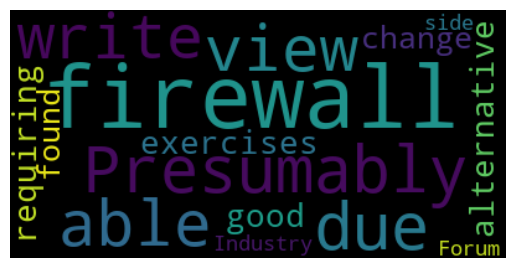

In [59]:
text = results_df['What could we do to improve the course in the future?'][5]

# Create a word cloud image:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor, max_words = 500,  max_font_size = 30)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

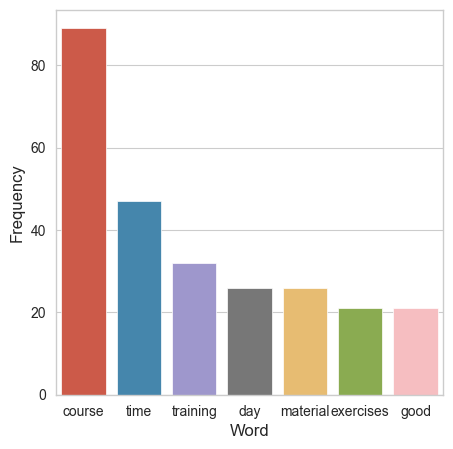

In [61]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = results_df['What could we do to improve the course in the future?'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

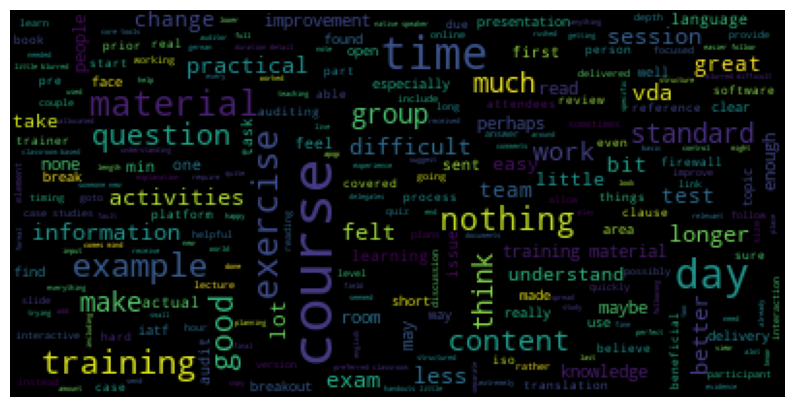

In [62]:
wc(cleaned_data_title,'black','Common Words')

# End